# **Search Kalimat Penting Dalam Berita**

## **Crowling Artikel Berita dari Website**

Web crawling adalah proses otomatis untuk mengumpulkan informasi dari World Wide Web, di mana "crawler" atau "spider" (program komputer) secara sistematis menjelajahi halaman web, mengumpulkan data, dan menyimpannya untuk penggunaan lebih lanjut.

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

def scrape_detik():
    url = 'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page=1'
    req = requests.get(url)
    sop = BeautifulSoup(req.text, 'html.parser')
    li = sop.find('div', class_='list media_rows list-berita')
    lin = li.find_all('article')

    x = lin[0]  # Ambil hanya satu artikel, yaitu yang pertama
    link = x.find('a')['href']
    date = x.find('a').find('span', class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
    headline = x.find('a').find('h2').text

    ge_ = requests.get(link).text
    sop_ = BeautifulSoup(ge_, 'html.parser')
    content = sop_.find('div', class_='detail__body-text itp_bodycontent')

    paragraphs = content.find_all('p')
    content_ = ''.join([p.get_text(strip=True) for p in paragraphs])

    return content_

# Panggil fungsi untuk scraping satu artikel
data = scrape_detik()
print(data)

Wakil PresidenMa'ruf Aminmengimbau kepada seluruh KBRI untuk menyelenggarakanPemilu 2024bagi WNI di luar negeri dengan jujur dan adil. Ma'ruf mengingatkan agar para petugas netral dalam melaksanakan pemilihan."Saya kira nanti seperti apa persiapan Pemilu, tapi saya mengimbau di seluruh KBRI di luar negeri supaya menyelenggarakan Pemilu dengan baik dan supaya ada netralitas dari pihak kedutaan besar kita supaya Pemilu berjalan dengan jurdil," kata Ma'ruf di Bratislava, Slovakia, Sabtu (25/11/2023).Ma'ruf berharap Pemilu berjalan bersih sehingga kualitas demokrasi di Indonesia lebih baik. Dia mengingatkan jangan sampai ada tekanan.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Itu dengan jujur dan adil, dengan bersih dan tidak ada tekanan dari mana-mana, supaya berjalan sesuai dengan kita harapkan supaya kualitas demokrasi kita menjadi lebih baik," tutur Ma'ruf.Ma'ruf menyampaikan pilihan setiap warga negara Indonesia harua dihormati. Dia tidak ingin pesan netralitas hanya sebata slogan."Y

## **Tokenisasi Kalimat**

Tokenisasi kalimat adalah proses memecah teks menjadi kalimat-kalimat individual. Tujuan dari tokenisasi kalimat adalah untuk memisahkan teks menjadi unit-unit yang lebih kecil, yaitu kalimat, sehingga memudahkan analisis dan pemrosesan lebih lanjut pada tingkat kalimat.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Fungsi untuk tokenisasi kalimat
def tokenisasi_text(teks):
    # Tokenisasi kalimat
    kalimat = sent_tokenize(teks)
    return kalimat

sentence = tokenisasi_text(data)
print(sentence)

["Wakil PresidenMa'ruf Aminmengimbau kepada seluruh KBRI untuk menyelenggarakanPemilu 2024bagi WNI di luar negeri dengan jujur dan adil.", "Ma'ruf mengingatkan agar para petugas netral dalam melaksanakan pemilihan.", '"Saya kira nanti seperti apa persiapan Pemilu, tapi saya mengimbau di seluruh KBRI di luar negeri supaya menyelenggarakan Pemilu dengan baik dan supaya ada netralitas dari pihak kedutaan besar kita supaya Pemilu berjalan dengan jurdil," kata Ma\'ruf di Bratislava, Slovakia, Sabtu (25/11/2023).Ma\'ruf berharap Pemilu berjalan bersih sehingga kualitas demokrasi di Indonesia lebih baik.', 'Dia mengingatkan jangan sampai ada tekanan.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Itu dengan jujur dan adil, dengan bersih dan tidak ada tekanan dari mana-mana, supaya berjalan sesuai dengan kita harapkan supaya kualitas demokrasi kita menjadi lebih baik," tutur Ma\'ruf.Ma\'ruf menyampaikan pilihan setiap warga negara Indonesia harua dihormati.', 'Dia tidak ingin pesan netralitas han

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **TF-IDF**

TF-IDF "Term Frequency-Inverse Document Frequency" adalah teknik yang digunakan dalam pemrosesan bahasa alami dan pengelolaan informasi untuk mengevaluasi seberapa penting sebuah kata dalam suatu dokumen relatif terhadap kumpulan dokumen yang lebih besar. TF-IDF memberikan bobot numerik untuk setiap kata dalam dokumen, mencerminkan seberapa sering kata tersebut muncul dalam dokumen tersebut dan seberapa uniknya di antara seluruh kumpulan dokumen.

### **Rumus**

$$
W1= tf1 * log \frac{D}{df1}
$$


KETERANGAN:
- W1​ adalah bobot dari term (kata atau token) pertama dalam dokumen.
- tf1 adalah frekuensi kemunculan term pertama dalam dokumen (Term Frequency).
- df1 adalah jumlah dokumen yang berisi term pertama (Document Frequency).
- D adalah total jumlah dokumen dalam korpus atau koleksi dokumen yang sedang diproses.
- log⁡ adalah fungsi logaritma yang umumnya menggunakan basis 10 atau basis lainnya tergantung pada implementasi yang digunakan

In [ ]:
import math
from collections import Counter
import pandas as pd

# Menghitung jumlah kata dalam setiap kalimat
tf_kalimat = [Counter(words.split()) for words in sentence]

# Menghitung IDF (Inverse Document Frequency)
def calculate_tf_idf(tf_kalimat):
    num_documents = len(tf_kalimat)
    idf_values = {}

    # Mencari setiap kata dalam setiap kalimat untuk menghitung IDF
    for tf in tf_kalimat:
        for word, count in tf.items():
            if word in idf_values:
                idf_values[word] += 1
            else:
                idf_values[word] = 1

    tf_idf_kalimat = []

    for tf in tf_kalimat:
        tf_idf = {}
        for word, count in tf.items():
            tf_idf[word] = (count / len(tf)) * math.log(num_documents / idf_values[word])
        tf_idf_kalimat.append(tf_idf)

    return tf_idf_kalimat

# Hasil TF-IDF
hasil_tf_idf = calculate_tf_idf(tf_kalimat)

# Mengonversi list of dicts ke dalam DataFrame
df_tf_idf = pd.DataFrame(hasil_tf_idf)
df_tf_idf.fillna(0, inplace=True)  # Mengganti nilai NaN dengan 0

# Tampilkan hasil dalam DataFrame
df_tf_idf


,Wakil,PresidenMa'ruf,Aminmengimbau,kepada,seluruh,KBRI,untuk,menyelenggarakanPemilu,2024bagi,WNI,...,sini,semuanya,"perempuan,",kami.,Insyaallah,adil,disampaikan,Wapres,"tadi,""",dia.
0,0.155239,0.155239,0.155239,0.114465,0.114465,0.114465,0.090614,0.155239,0.155239,0.114465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.044225,0.044225,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.051208,0.000000,0.000000,0.081076,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045307,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## **Cosine Smilarity**


Cosine similarity adalah metode pengukuran kesamaan antara dua vektor non-nol dalam ruang vektor, terutama sering digunakan dalam konteks pemrosesan bahasa alami dan analisis teks. Metode ini membandingkan sudut antara dua vektor untuk menentukan sejauh mana vektor-vektor tersebut mirip satu sama lain.

### **Rumus**

$$
sim(Q, Di) = \frac{{\sum_{i}WQ,jWi,j}}{{\sum_{j}W^2Q,j} {\sum_{i}W^2 i,j}}
$$

KETERANGAN:
- Q adalah vektor representasi dari query (pertanyaan atau pencarian) yang ingin dicocokkan dengan dokumen.
- Di adalah vektor representasi dari dokumen ke-i yang ada dalam koleksi.
- ∑i​WQ,j​Wi,j​ adalah hasil dari perkalian titik antara vektor query QQ dan vektor dokumen Di
- ∑j​WQ,j2​ adalah penjumlahan kuadrat dari setiap elemen dalam vektor query Q
- ∑i​Wi,j2​ adalah penjumlahan kuadrat dari setiap elemen dalam vektor dokumen DiDi

In [ ]:
import math
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Diasumsikan hasil_tf_idf adalah list yang berisi nilai TF-IDF

# Mengonversi list dari kamus ke DataFrame pandas
df_tf_idf = pd.DataFrame(hasil_tf_idf)
df_tf_idf = df_tf_idf.fillna(0)  # Mengganti nilai NaN dengan 0

# Mengonversi DataFrame ke array NumPy untuk perhitungan kesamaan kosinus
tfidf_matrix = df_tf_idf.to_numpy()

# Menghitung kesamaan kosinus
similarity_matrix = cosine_similarity(tfidf_matrix)
df_tf_idf = pd.DataFrame(similarity_matrix)

kalimat = ["Kalimat " + str(i) for i in range(1, len(similarity_matrix) + 1)]
df_tf_idf = df_tf_idf.set_axis(kalimat, axis=0)
df_tf_idf = df_tf_idf.set_axis(kalimat, axis=1)

df_tf_idf

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14
Kalimat 1,1.000000,0.000000,0.154347,0.062101,0.000000,0.060941,0.026099,0.058708,0.037752,0.000000,0.015027,0.000000,0.006602,0.066281
Kalimat 2,0.000000,1.000000,0.022004,0.037278,0.000000,0.124581,0.026403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 3,0.154347,0.022004,1.000000,0.229760,0.016161,0.148848,0.079797,0.013327,0.111043,0.044691,0.073359,0.000000,0.042960,0.076722
Kalimat 4,0.062101,0.037278,0.229760,1.000000,0.067340,0.133188,0.041109,0.028299,0.050858,0.000000,0.042931,0.023509,0.030255,0.118661
Kalimat 5,0.000000,0.000000,0.016161,0.067340,1.000000,0.014335,0.066178,0.000000,0.000000,0.000000,0.000000,0.054614,0.000000,0.000000
Kalimat 6,0.060941,0.124581,0.148848,0.133188,0.014335,1.000000,0.064544,0.023644,0.026185,0.000000,0.051118,0.000000,0.044325,0.027138
Kalimat 7,0.026099,0.026403,0.079797,0.041109,0.066178,0.064544,1.000000,0.000000,0.101520,0.017875,0.072520,0.000000,0.004339,0.015215
Kalimat 8,0.058708,0.000000,0.013327,0.028299,0.000000,0.023644,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062228
Kalimat 9,0.037752,0.000000,0.111043,0.050858,0.000000,0.026185,0.101520,0.000000,1.000000,0.178349,0.040387,0.000000,0.004892,0.103794
Kalimat 10,0.000000,0.000000,0.044691,0.000000,0.000000,0.000000,0.017875,0.000000,0.178349,1.000000,0.000000,0.000000,0.000000,0.043589


## **Visualisasi Kalimat Ke dalam Bentuk Graph**

Graph adalah struktur data yang terdiri dari simpul-simpul (node) dan sisi-sisi (edge) yang menghubungkan simpul-simpul tersebut. Graf digunakan untuk memodelkan berbagai konsep, termasuk jaringan komputer, relasi antar entitas, dan banyak lagi.

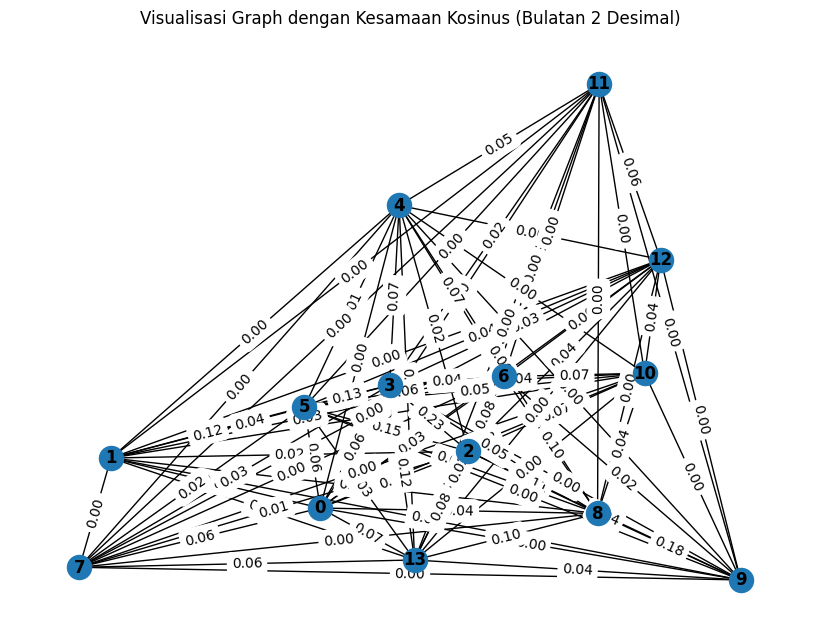

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge
plt.title("Visualisasi Graph dengan Kesamaan Kosinus (Bulatan 2 Desimal)")
plt.show()


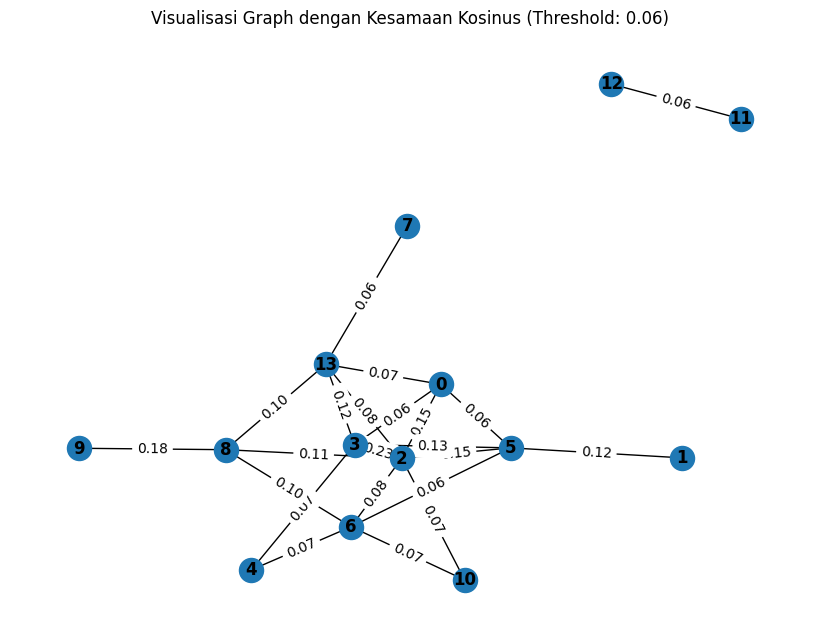

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
G.add_nodes_from(range(len(similarity_matrix)))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    # isolated_nodes_labels = {node: f'Node {node} (Not connected)' for node in isolated_nodes}
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


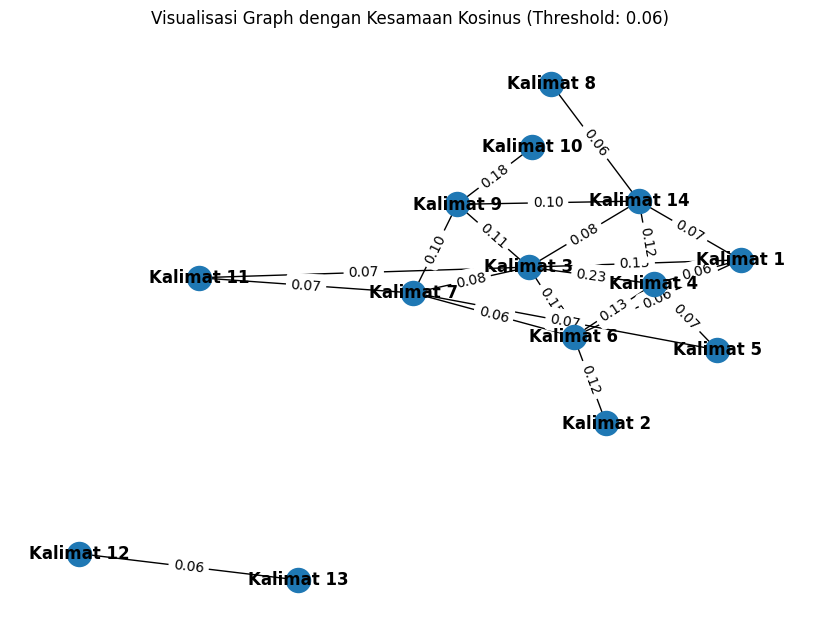

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


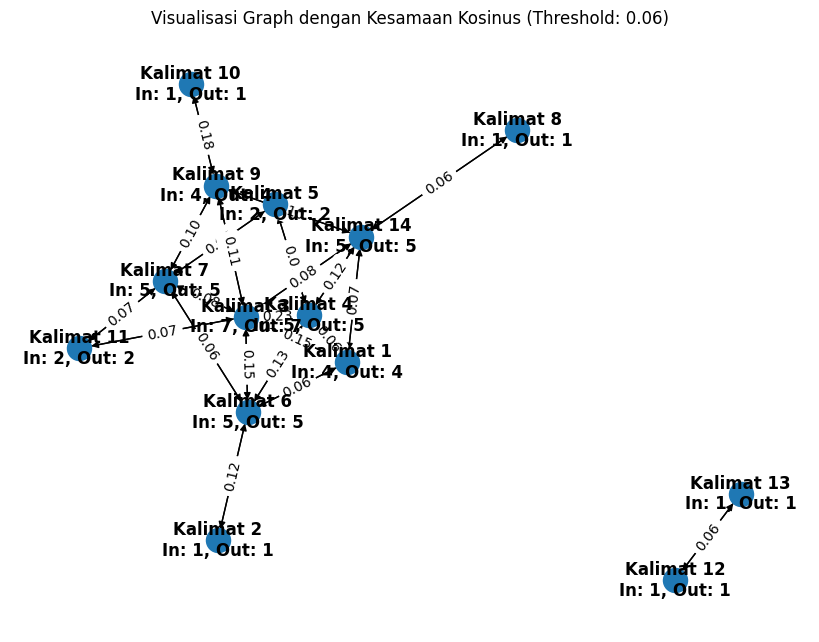

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.DiGraph()  # Menggunakan Directed Graph agar dapat mengakses in_degree dan out_degree
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Hitung indegree dan outdegree untuk setiap node
indegree = dict(G.in_degree())
outdegree = dict(G.out_degree())

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}\nIn: {indegree[i]}, Out: {outdegree[i]}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


## **Closeness Centrality**

Closeness centrality adalah sebuah metrik dalam analisis jaringan yang mengukur sejauh mana suatu simpul (node) dalam jaringan mendekati simpul-simpul lainnya. Simpul dengan closeness centrality yang tinggi dianggap lebih dekat atau lebih "sentral" dalam arti jarak atau aksesibilitas dalam jaringan.

Metrik closeness centrality dihitung berdasarkan reciprok dari total jarak dari suatu simpul ke semua simpul lainnya dalam jaringan. Semakin kecil total jarak, semakin besar nilai closeness centrality. Ini berarti simpul yang lebih dekat dengan simpul-simpul lainnya memiliki nilai closeness centrality yang lebih tinggi.

In [ ]:
# Menghitung closeness centrality dari graph
closeness = nx.closeness_centrality(G)

# Menampilkan closeness centrality
print("Closeness Centrality:")
for node, closeness_value in closeness.items():
    print(f"Node {node}: {closeness_value}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on closeness centrality:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

Closeness Centrality:
Node 0: 0.4898785425101215
Node 1: 0.3209549071618037
Node 2: 0.6205128205128204
Node 3: 0.5170940170940171
Node 4: 0.40468227424749165
Node 5: 0.4898785425101215
Node 6: 0.5170940170940171
Node 7: 0.3324175824175824
Node 8: 0.4898785425101215
Node 9: 0.3209549071618037
Node 10: 0.40468227424749165
Node 11: 0.07692307692307693
Node 12: 0.07692307692307693
Node 13: 0.5170940170940171
Top 4 sentences based on closeness centrality:
"Saya kira nanti seperti apa persiapan Pemilu, tapi saya mengimbau di seluruh KBRI di luar negeri supaya menyelenggarakan Pemilu dengan baik dan supaya ada netralitas dari pihak kedutaan besar kita supaya Pemilu berjalan dengan jurdil," kata Ma'ruf di Bratislava, Slovakia, Sabtu (25/11/2023).Ma'ruf berharap Pemilu berjalan bersih sehingga kualitas demokrasi di Indonesia lebih baik.
Dia mengingatkan jangan sampai ada tekanan.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Itu dengan jujur dan adil, dengan bersih dan tidak ada tekanan dari mana

## **PageRank**

PageRank adalah algoritma yang digunakan oleh mesin pencari Google untuk memberikan peringkat pada halaman-halaman web dalam hasil pencarian. Algoritma ini dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google, dan dinamai dari nama Larry Page.

Tujuan utama PageRank adalah mengukur seberapa penting atau otoritatif sebuah halaman web dengan mempertimbangkan struktur tautan antar halaman-halaman tersebut. Ide dasar di balik PageRank adalah bahwa halaman web yang banyak dihubungkan oleh halaman-halaman lain memiliki tingkat otoritas yang lebih tinggi.

### **Rumus**

$$
PR(u) = (1-d) . \frac{1}{N} + d . \sum_{v∈Bu} \frac{PR(v)}{L(v)}
$$


KETERANGAN:
- ( PR(u) ) adalah PageRank dari halaman ( u ).
- ( d ) adalah damping factor, biasanya diatur sebagai 0.85.
- ( N ) adalah jumlah total halaman dalam graf (jumlah node dalam graf).
- ( B_u ) adalah himpunan halaman yang memiliki tautan ke halaman ( u ).
- ( L(v) ) adalah jumlah tautan keluar dari halaman ( v )."

In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Menampilkan Closeness Centrality
print("PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node + 1])

print("=============================")
print("Top 4 kalimat based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(f"Kalimat {node + 1} dengan PageRank {rank:.4f}")

#sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

PageRank:
Kalimat 1: 0.0649633325505032
Kalimat 2: 0.030322523813109743
Kalimat 3: 0.15632523925171132
Kalimat 4: 0.11209509346460973
Kalimat 5: 0.03391674013690197
Kalimat 6: 0.0999647147558687
Kalimat 7: 0.07835327009974778
Kalimat 8: 0.021140038155221613
Kalimat 9: 0.09736561932887028
Kalimat 10: 0.04111716259548319
Kalimat 11: 0.0336738232229541
Kalimat 12: 0.07142857142857142
Kalimat 13: 0.07142857142857142
Kalimat 14: 0.0879052997678754
Top 4 sentences based on PageRank:
Dia mengingatkan jangan sampai ada tekanan.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Itu dengan jujur dan adil, dengan bersih dan tidak ada tekanan dari mana-mana, supaya berjalan sesuai dengan kita harapkan supaya kualitas demokrasi kita menjadi lebih baik," tutur Ma'ruf.Ma'ruf menyampaikan pilihan setiap warga negara Indonesia harua dihormati.
Dia tidak ingin pesan netralitas hanya sebata slogan.
"Ya bukan slogan, betul-betul dijalankan denga baik," kata Ma'ruf menjawab soal jangan sampai netralitas hanya se

In [ ]:
import networkx as nx

# Buat graf
G = nx.Graph()
G.add_edges_from(edge_labels)

# Inisialisasi PageRank
pagerank = {node: 1 / len(G.nodes) for node in G.nodes}

# Iterasi untuk menghitung PageRank
num_iterations = 10

for iteration in range(num_iterations):
    print(f"Iterasi {iteration + 1}:")
    new_pagerank = {}
    damping_factor = 0.85

    for node in G.nodes:
        rank_sum = 0
        for neighbor in G.neighbors(node):
            neighbor_outdegree = len(list(G.neighbors(neighbor)))
            rank_sum += pagerank[neighbor] / neighbor_outdegree

        # Hitung PageRank baru menggunakan rumus
        new_pagerank[node] = (1 - damping_factor) / len(G.nodes) + damping_factor * rank_sum

        # Cetak langkah-langkah perhitungan PageRank untuk setiap node
        print(f"  - Kalimat {node + 1}: ({(1 - damping_factor)}/{len(G.nodes)}) + ({damping_factor} * {rank_sum}) = {new_pagerank[node]}")

    # Perbarui nilai PageRank
    pagerank = new_pagerank
    print("\n")

# Menampilkan hasil PageRank akhir
print("Hasil Akhir PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")


Iterasi 1:
  - Kalimat 1: (0.15000000000000002/14) + (0.85 * 0.053061224489795916) = 0.05581632653061225
  - Kalimat 3: (0.15000000000000002/14) + (0.85 * 0.12857142857142856) = 0.12
  - Kalimat 4: (0.15000000000000002/14) + (0.85 * 0.0923469387755102) = 0.08920918367346939
  - Kalimat 6: (0.15000000000000002/14) + (0.85 * 0.1280612244897959) = 0.11956632653061224
  - Kalimat 14: (0.15000000000000002/14) + (0.85 * 0.13163265306122449) = 0.12260204081632653
  - Kalimat 2: (0.15000000000000002/14) + (0.85 * 0.014285714285714285) = 0.02285714285714286
  - Kalimat 7: (0.15000000000000002/14) + (0.85 * 0.11377551020408162) = 0.1074234693877551
  - Kalimat 9: (0.15000000000000002/14) + (0.85 * 0.11020408163265306) = 0.10438775510204082
  - Kalimat 11: (0.15000000000000002/14) + (0.85 * 0.024489795918367346) = 0.03153061224489796
  - Kalimat 5: (0.15000000000000002/14) + (0.85 * 0.02857142857142857) = 0.035
  - Kalimat 8: (0.15000000000000002/14) + (0.85 * 0.014285714285714285) = 0.0228571428

## **Mencari 4 Kalimat Penting**

In [ ]:
# Hitung Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Hitung Eigenvalue Centrality
eigenvalue = nx.eigenvector_centrality_numpy(G)

# Menampilkan Eigenvector Centrality
print("Eigenvector Centrality:")
for node, eigenvector_value in eigenvector.items():
    print(f"Node {node}: {eigenvector_value:.4f}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")


print("=============================")

# Menampilkan Eigenvalue Centrality
print("Eigenvalue Centrality:")
for node, eigenvalue_value in eigenvalue.items():
    print(f"Node {node}: {eigenvalue_value:.4f}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(eigenvalue.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 4 node based on PageRank:")
for node, rank in sorted_pagerank[:4]:
    print(f"Node {node} dengan PageRank {rank:.4f}")



Eigenvector Centrality:
Node 1: 0.4352
Node 2: 0.5573
Node 3: 0.5573
Node 4: 0.4352
Top 4 sentences based on PageRank:
"Saya kira nanti seperti apa persiapan Pemilu, tapi saya mengimbau di seluruh KBRI di luar negeri supaya menyelenggarakan Pemilu dengan baik dan supaya ada netralitas dari pihak kedutaan besar kita supaya Pemilu berjalan dengan jurdil," kata Ma'ruf di Bratislava, Slovakia, Sabtu (25/11/2023).Ma'ruf berharap Pemilu berjalan bersih sehingga kualitas demokrasi di Indonesia lebih baik.
Dia mengingatkan jangan sampai ada tekanan.ADVERTISEMENTSCROLL TO CONTINUE WITH CONTENT"Itu dengan jujur dan adil, dengan bersih dan tidak ada tekanan dari mana-mana, supaya berjalan sesuai dengan kita harapkan supaya kualitas demokrasi kita menjadi lebih baik," tutur Ma'ruf.Ma'ruf menyampaikan pilihan setiap warga negara Indonesia harua dihormati.
Ma'ruf mengingatkan agar para petugas netral dalam melaksanakan pemilihan.
Dia tidak ingin pesan netralitas hanya sebata slogan.
Top 3 node based